In [1]:
import numpy as np
import pandas as pd

In [3]:
#csv파일을 읽어와서 npy로 변환 / 데이터셋 생성과정에서 npy로 변환하여 저장하는 것이 좋을듯
e_data = pd.read_csv('./dataset/e_fdata.csv', header=None)
i_data = pd.read_csv('./dataset/i_fdata.csv', header=None)
l_data = pd.read_csv('./dataset/l_fdata.csv', header=None)
o_data = pd.read_csv('./dataset/o_fdata.csv', header=None)
u_data = pd.read_csv('./dataset/u_fdata.csv', header=None)
v_data = pd.read_csv('./dataset/v_fdata.csv', header=None)
y_data = pd.read_csv('./dataset/y_fdata.csv', header=None)

e_train_data = np.array(e_data)
i_train_data = np.array(i_data)
l_train_data = np.array(l_data)
o_train_data = np.array(o_data)
u_train_data = np.array(u_data)
v_train_data = np.array(v_data)
y_train_data = np.array(y_data)

#csv파일을 npy로 변환하여 concatnate

data = np.concatenate((e_train_data,
                       i_train_data,
                       l_train_data,
                       o_train_data,
                       u_train_data,
                       v_train_data,
                       y_train_data), axis=0)

gesture = ['e', 'i', 'l', 'o', 'u', 'v', 'y']

print(data.shape)
print(len(gesture))

(1400, 16)
7


In [4]:
x_data = data[:,:-1]
labels = data[:,-1]

print(x_data.shape)
print(labels.shape)

(1400, 15)
(1400,)


In [5]:
#one-hot encoding
from sklearn.preprocessing import OneHotEncoder

enc = OneHotEncoder()
y_data = enc.fit_transform(labels.reshape(-1,1)).toarray()

print(y_data.shape)

print(y_data[0])

(1400, 7)
[1. 0. 0. 0. 0. 0. 0.]


In [6]:
from sklearn.model_selection import train_test_split

x_data = x_data.astype(np.float32)
y_data = y_data.astype(np.float32)

x_data_train, x_data_test, y_data_train, y_data_test = train_test_split(x_data, y_data, test_size=0.2, random_state=0)

print(x_data_train.shape, x_data_test.shape)
print(y_data_train.shape, y_data_test.shape) 
print(x_data_train[0])
print(y_data_train[0])

(1120, 15) (280, 15)
(1120, 7) (280, 7)
[22.375252 15.498793  6.265651 35.45093  86.223366 33.085823 33.153336
 95.4777   35.63967  28.647976 89.76065  36.83758  25.40758  68.49815
 45.920403]
[0. 0. 0. 1. 0. 0. 0.]


In [7]:
#KNN 모델 TEST
from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors=6)

knn.fit(x_data_train, y_data_train)

y_pred = knn.predict(x_data_test)

y_pred1 = knn.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

y_pred2 = knn.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

print(knn.score(x_data_test, y_data_test))
print(y_pred1)
print(y_pred2) 

0.9857142857142858
[[0. 0. 0. 0. 0. 1. 0.]]
[[0. 0. 0. 0. 0. 1. 0.]]


In [24]:
#Sequential Model TEST
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
#from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping
import matplotlib.pyplot as plt


model = Sequential()
model.add(Dense(64, input_shape=(15,), activation="relu"))
model.add(Dense(32, activation="relu"))
model.add(Dense(7, activation='softmax'))

model.compile( loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.summary()

Model: "sequential_5"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_16 (Dense)            (None, 64)                1024      
                                                                 
 dense_17 (Dense)            (None, 32)                2080      
                                                                 
 dense_18 (Dense)            (None, 7)                 231       
                                                                 
Total params: 3,335
Trainable params: 3,335
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# history = model.fit(x_data_train, y_data_train, epochs=200, batch_size=8)

# test_loss, test_acc = model.evaluate(x_data_test, y_data_test)

# loss = history.history['loss']
# acc = history.history['accuracy']
# epochs = range(1, len(loss)+1)

# plt.plot(epochs, loss, 'r', label='Loss')
# plt.plot(epochs, acc, 'g', label='Accuracy')
# plt.legend()
# plt.xlabel('epochs')
# plt.ylabel('loss/acc')
# plt.show()

# print("loss : ", test_loss)
# print("acc : ", test_acc)

# y_pred1 = model.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

# y_pred2 = model.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

# print(np.round(y_pred1)) #[[0. 0. 0. 0. 1. 0. 0.]]
# print(np.round(y_pred2)) #[[0. 0. 0. 0. 0. 1. 0.]]

Epoch 1/2000
 97/105 [==========================>...] - ETA: 0s - loss: 4.6692 - accuracy: 0.7204    
Epoch 1: val_loss improved from inf to 0.23105, saving model to ./model/01model.hdf5
105/105 [==============================] - 1s 6ms/step - loss: 4.3353 - accuracy: 0.7369 - val_loss: 0.2310 - val_accuracy: 0.9321
Epoch 2/2000
 80/105 [=====================>........] - ETA: 0s - loss: 0.1730 - accuracy: 0.9312
Epoch 2: val_loss improved from 0.23105 to 0.12772, saving model to ./model/02model.hdf5
105/105 [==============================] - 0s 2ms/step - loss: 0.1718 - accuracy: 0.9286 - val_loss: 0.1277 - val_accuracy: 0.9321
Epoch 3/2000
 98/105 [===========================>..] - ETA: 0s - loss: 0.1213 - accuracy: 0.9528
Epoch 3: val_loss improved from 0.12772 to 0.05661, saving model to ./model/03model.hdf5
105/105 [==============================] - 0s 2ms/step - loss: 0.1174 - accuracy: 0.9548 - val_loss: 0.0566 - val_accuracy: 0.9821
Epoch 4/2000
 99/105 [========================

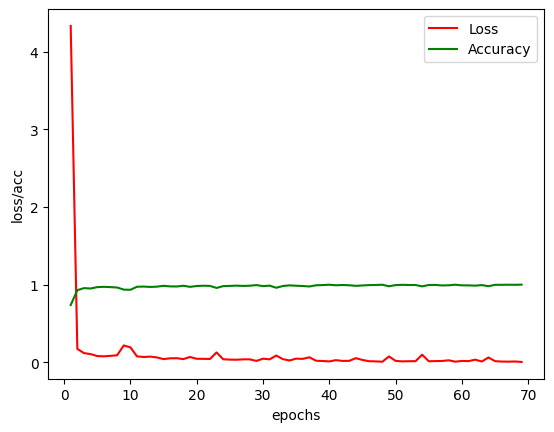

loss :  0.002575381426140666
acc :  1.0
1/1 [==============================] - 0s 39ms/step
[[0. 0. 0. 0. 1. 0. 0.]]
[[0. 0. 0. 0. 0. 1. 0.]]


In [25]:
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping

early_stopping_callback = EarlyStopping(monitor='val_loss', patience=10)

modelpath = "./model/{epoch:02d}model.hdf5"

checkpointer = ModelCheckpoint(filepath=modelpath, monitor='val_loss', verbose=1, save_best_only=True)

history = model.fit(x_data_train, y_data_train, validation_split=0.25, epochs=2000, batch_size=8,
                    verbose=1, callbacks=[early_stopping_callback, checkpointer])

test_loss, test_acc = model.evaluate(x_data_test, y_data_test)

loss = history.history['loss']
acc = history.history['accuracy']
epochs = range(1, len(loss)+1)

plt.plot(epochs, loss, 'r', label='Loss')
plt.plot(epochs, acc, 'g', label='Accuracy')
plt.legend()
plt.xlabel('epochs')
plt.ylabel('loss/acc')
plt.show()

print("loss : ", test_loss)
print("acc : ", test_acc)

y_pred1 = model.predict([[20,36,22,13,2,3,7,4,3,20,150,9,33,138,9]]) #u

y_pred2 = model.predict([[25,40,11,10,2,1,8,2,5,21,150,12,5,160,7]]) #v

print(np.round(y_pred1)) #[[0. 0. 0. 0. 1. 0. 0.]]
print(np.round(y_pred2)) #[[0. 0. 0. 0. 0. 1. 0.]]

In [23]:
del model

NameError: name 'model' is not defined